In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow as tf  # Importing TensorFlow, a powerful library for deep learning and machine learning tasks, especially useful for building neural networks.
from sklearn.preprocessing import StandardScaler  # Importing StandardScaler to normalize or standardize features by removing the mean and scaling to unit variance.
import tensorflow.keras as k  # Importing Keras (part of TensorFlow) for building and training deep learning models easily.
from sklearn.model_selection import train_test_split  # Importing train_test_split to split data into training and testing sets.
from matplotlib import pyplot as plt  # Importing matplotlib's pyplot to visualize data and create plots.
import time  # Importing time to track execution times during training or testing models.
from tensorflow.keras import Sequential  # Importing the Sequential class from Keras to create a sequential model, which is a linear stack of layers.
from tensorflow.keras.layers import Dense  # Importing the Dense layer, which is a fully connected layer, commonly used in neural networks

2024-11-11 18:20:34.917909: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-11 18:20:35.014147: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731329435.053904    4213 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731329435.064917    4213 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-11 18:20:35.153589: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

# Project Overview: Predicting Stress Levels Using Photoplethysmography Features

Welcome to our new data science project, where the goal is to predict stress levels using Photoplethysmography (PPG) features. Throughout this project, we will dive into the world of classification algorithms and specifically leverage Artificial Neural Networks (ANNs) to achieve our predictive goal.

## Key Concepts Covered:

1. **Understanding Classification:**
   - We’ll explore the concept of classification, a machine learning technique used to categorize data into distinct classes, such as “high stress” or “low stress” in our case.

2. **Photoplethysmography (PPG) and Heart Rate Variability (HRV):**
   - Learn what PPG is and how it measures heart rate variability, which is key to stress prediction.

3. **Data Cleaning and Preprocessing:**
   - Understand how to handle outliers, missing values, and perform feature selection.

4. **Building and Training Neural Networks:**
   - We’ll train Artificial Neural Networks (ANNs) to classify stress levels based on the PPG data.

## What is Classification?

Classification is a common type of machine learning algorithm used to categorize data into two or more classes. Some examples of classification problems include:

- **Object Classification:** Recognizing objects in images.
- **Sentiment Classification:** Determining if a text has positive or negative sentiment.
- **Flower Classification:** Identifying different species of flowers.
- **Tumor Classification:** Predicting if a tumor is benign or malignant.

In this project, we will be tackling a similar classification problem—predicting stress levels from PPG data.

## What is Photoplethysmography (PPG)?

Photoplethysmography (PPG) uses infrared light to measure volumetric variations of blood circulation. PPG is a non-invasive method that helps in tracking changes in heart rate and blood flow, which are useful indicators of stress.

---

This project is designed to take you through a complete end-to-end machine learning workflow, from data preprocessing to model deployment. Let’s get started!

In [9]:
# Loading Training Data
time_domain_train = pd.read_csv('/home/gesture-queen/Desktop/EmulsifyFinal/StressPrictionDATAset/Train Data/Train Data Zip/time_domain_features_train.csv')
frequency_domain_train = pd.read_csv('/home/gesture-queen/Desktop/EmulsifyFinal/StressPrictionDATAset/Train Data/Train Data Zip/frequency_domain_features_train.csv')
non_linear_features_train = pd.read_csv('/home/gesture-queen/Desktop/EmulsifyFinal/StressPrictionDATAset/Train Data/Train Data Zip/heart_rate_non_linear_features_train.csv')
# Loading Test Data
time_domain_test = pd.read_csv('/home/gesture-queen/Desktop/EmulsifyFinal/StressPrictionDATAset/Test Data/Test Zip/time_domain_features_test.csv')
frequency_domain_test = pd.read_csv('/home/gesture-queen/Desktop/EmulsifyFinal/StressPrictionDATAset/Test Data/Test Zip/frequency_domain_features_test.csv')
non_linear_features_test = pd.read_csv('/home/gesture-queen/Desktop/EmulsifyFinal/StressPrictionDATAset/Test Data/Test Zip/heart_rate_non_linear_features_test.csv')

In [10]:
# List of file paths
files = [
    '/home/gesture-queen/Desktop/EmulsifyFinal/StressPrictionDATAset/Train Data/Train Data Zip/frequency_domain_features_train.csv',
    '/home/gesture-queen/Desktop/EmulsifyFinal/StressPrictionDATAset/Train Data/Train Data Zip/heart_rate_non_linear_features_train.csv',
    '/home/gesture-queen/Desktop/EmulsifyFinal/StressPrictionDATAset/Train Data/Train Data Zip/time_domain_features_train.csv',
    '/home/gesture-queen/Desktop/EmulsifyFinal/StressPrictionDATAset/Test Data/Test Zip/frequency_domain_features_test.csv',
    '/home/gesture-queen/Desktop/EmulsifyFinal/StressPrictionDATAset/Test Data/Test Zip/heart_rate_non_linear_features_test.csv',
    '/home/gesture-queen/Desktop/EmulsifyFinal/StressPrictionDATAset/Test Data/Test Zip/time_domain_features_test.csv'
    ]

# Loop to read and print the head of each CSV file
for file_path in files:
    print(f"Displaying head of file: {file_path}")
    df = pd.read_csv(file_path)
    print(df.head(), "\n")

Displaying head of file: /home/gesture-queen/Desktop/EmulsifyFinal/StressPrictionDATAset/Train Data/Train Data Zip/frequency_domain_features_train.csv
                                   uuid          VLF    VLF_PCT           LF  \
0  89df2855-56eb-4706-a23b-b39363dd605a  2661.894136  72.203287  1009.249419   
1  80c795e4-aa56-4cc0-939c-19634b89cbb2  2314.265450  76.975728   690.113275   
2  c2d5d102-967c-487d-88f2-8b005a449f3e  1373.887112  51.152225  1298.222619   
3  37eabc44-1349-4040-8896-0d113ad4811f  2410.357408  70.180308  1005.981659   
4  aa777a6a-7aa3-4f6e-aced-70f8691dd2b7  1151.177330  43.918366  1421.782051   

      LF_PCT      LF_NU         HF    HF_PCT     HF_NU           TP  \
0  27.375666  98.485263  15.522603  0.421047  1.514737  3686.666157   
1  22.954139  99.695397   2.108525  0.070133  0.304603  3006.487251   
2  48.335104  98.950472  13.769729  0.512671  1.049528  2685.879461   
3  29.290305  98.224706  18.181913  0.529387  1.775294  3434.520980   
4  54.242160 

In [11]:
df.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,pNN25,pNN50,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,uuid
0,934.665288,939.03173,82.139495,11.801781,11.801772,6.959924,3.933333,0.133333,-0.680262,-0.233075,0.000016,0.000288,0.012933,0.004578,0.004578,2.825038,-0.680262,-0.233075,62b75db5-bc40-4c8f-9166-daf0efcab4c2
1,817.062380,816.33879,55.492332,20.558810,20.558768,2.699200,24.600000,0.533333,-0.034454,-0.051689,0.000040,-0.002749,0.025148,0.013921,0.013921,1.806517,-0.034454,-0.051689,a99549ad-3eb6-4413-bc90-9053e7f7e684
2,876.762022,894.19889,88.690820,13.853737,13.853730,6.401942,7.066667,0.533333,-0.206953,-0.589940,0.000010,-0.000172,0.015533,0.008149,0.008149,1.906180,-0.206953,-0.589940,cb573d3a-c767-4556-b32e-ad8c08ded214
3,1038.640693,998.91429,213.725850,16.457194,16.454801,12.986774,10.800000,1.866667,-0.820407,0.487198,-0.000238,-0.000464,0.016882,0.007587,0.007587,2.225116,-0.820407,0.487198,47a0c6de-2aef-4ac3-997d-252fa6fd07f1
4,774.548508,778.90508,51.577855,10.273114,10.273049,5.020664,2.000000,0.066667,1.738453,-0.005082,0.000054,-0.000006,0.013479,0.007811,0.007811,1.725606,1.738453,-0.005082,de3fd54f-c74e-4fe8-bf2a-7a127f68b312


In [12]:
from sklearn.preprocessing import LabelEncoder

# Combine the training datasets into one, removing any duplicate columns
combined_train = pd.concat([time_domain_train, frequency_domain_train, non_linear_features_train], axis=1)



# Apply LabelEncoder to the 'condition' column in the training dataset
le_train = LabelEncoder()
combined_train['condition'] = le_train.fit_transform(combined_train['condition'])

# Check the mapping of labels to integers in the training set
print("Label mapping in training set:")
for index, label in enumerate(le_train.classes_):
    print(f"{label}: {index}")

# Check the final training dataset
print("Shape of the combined train dataset:", combined_train.shape)
print(combined_train.head())

Label mapping in training set:
interruption: 0
no stress: 1
time pressure: 2
Shape of the combined train dataset: (369289, 39)
      MEAN_RR   MEDIAN_RR        SDRR      RMSSD       SDSD  SDRR_RMSSD  \
0  885.157845  853.763730  140.972741  15.554505  15.553371    9.063146   
1  939.425371  948.357865   81.317742  12.964439  12.964195    6.272369   
2  898.186047  907.006860   84.497236  16.305279  16.305274    5.182201   
3  881.757865  893.460030   90.370537  15.720468  15.720068    5.748591   
4  809.625331  811.184865   62.766242  19.213819  19.213657    3.266724   

          HR      pNN25     pNN50      KURT  ...           TP       LF_HF  \
0  69.499952  11.133333  0.533333 -0.856554  ...  3686.666157   65.018055   
1  64.363150   5.600000  0.000000 -0.408190  ...  3006.487251  327.296635   
2  67.450066  13.066667  0.200000  0.351789  ...  2685.879461   94.280910   
3  68.809562  11.800000  0.133333 -0.504947  ...  3434.520980   55.328701   
4  74.565728  20.200000  0.200000 -0.

In [13]:
combined_train.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,KURT,...,TP,LF_HF,HF_LF,uuid,SD1,SD2,sampen,higuci,datasetId,condition
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,-0.856554,...,3686.666157,65.018055,0.015380,89df2855-56eb-4706-a23b-b39363dd605a,11.001565,199.061782,2.139754,1.163485,2,1
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,-0.408190,...,3006.487251,327.296635,0.003055,80c795e4-aa56-4cc0-939c-19634b89cbb2,9.170129,114.634458,2.174499,1.084711,2,0
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,0.351789,...,2685.879461,94.280910,0.010607,c2d5d102-967c-487d-88f2-8b005a449f3e,11.533417,118.939253,2.135350,1.176315,2,0
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,-0.504947,...,3434.520980,55.328701,0.018074,37eabc44-1349-4040-8896-0d113ad4811f,11.119476,127.318597,2.178341,1.179688,2,1
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,-0.548408,...,2621.175204,29.487873,0.033912,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7,13.590641,87.718281,2.221121,1.249612,2,1


In [14]:
# Combine the test datasets into one, removing any duplicate columns
combined_test = pd.concat([time_domain_test, frequency_domain_test, non_linear_features_test], axis=1)

# Remove duplicate columns (if any)
combined_test = combined_test.loc[:, ~combined_test.columns.duplicated()]

# Apply LabelEncoder to the 'condition' column in the test dataset
le_test = LabelEncoder()
combined_test['condition'] = le_test.fit_transform(combined_test['condition'])

# Check the mapping of labels to integers in the test set
print("\nLabel mapping in test set:")
for index, label in enumerate(le_test.classes_):
    print(f"{label}: {index}")

# Check the final test dataset
print("Shape of the combined test dataset:", combined_test.shape)
print(combined_test.head())


Label mapping in test set:
interruption: 0
no stress: 1
time pressure: 2
Shape of the combined test dataset: (41033, 36)
       MEAN_RR  MEDIAN_RR        SDRR      RMSSD       SDSD  SDRR_RMSSD  \
0   934.665288  939.03173   82.139495  11.801781  11.801772    6.959924   
1   817.062380  816.33879   55.492332  20.558810  20.558768    2.699200   
2   876.762022  894.19889   88.690820  13.853737  13.853730    6.401942   
3  1038.640693  998.91429  213.725850  16.457194  16.454801   12.986774   
4   774.548508  778.90508   51.577855  10.273114  10.273049    5.020664   

       pNN25     pNN50      KURT      SKEW  ...     HF_NU           TP  \
0   3.933333  0.133333 -0.680262 -0.233075  ...  0.521803  2442.168645   
1  24.600000  0.533333 -0.034454 -0.051689  ...  2.490788  2162.409316   
2   7.066667  0.533333 -0.206953 -0.589940  ...  2.170614  2771.583978   
3  10.800000  1.866667 -0.820407  0.487198  ...  1.182194  6357.550689   
4   2.000000  0.066667  1.738453 -0.005082  ...  8.194943

In [15]:
combined_test.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,pNN25,pNN50,KURT,SKEW,...,HF_NU,TP,LF_HF,HF_LF,SD1,SD2,sampen,higuci,datasetId,condition
0,934.665288,939.03173,82.139495,11.801781,11.801772,6.959924,3.933333,0.133333,-0.680262,-0.233075,...,0.521803,2442.168645,190.643094,0.005245,8.347898,115.862444,2.209659,1.100715,2,2
1,817.062380,816.33879,55.492332,20.558810,20.558768,2.699200,24.600000,0.533333,-0.034454,-0.051689,...,2.490788,2162.409316,39.147940,0.025544,14.542096,77.118903,2.186132,1.290615,2,1
2,876.762022,894.19889,88.690820,13.853737,13.853730,6.401942,7.066667,0.533333,-0.206953,-0.589940,...,2.170614,2771.583978,45.069921,0.022188,9.799336,125.044377,2.051571,1.226663,2,1
3,1038.640693,998.91429,213.725850,16.457194,16.454801,12.986774,10.800000,1.866667,-0.820407,0.487198,...,1.182194,6357.550689,83.588517,0.011963,11.639185,302.029812,2.080910,1.085143,2,2
4,774.548508,778.90508,51.577855,10.273114,10.273049,5.020664,2.000000,0.066667,1.738453,-0.005082,...,8.194943,1373.104689,11.202647,0.089265,7.266567,72.579248,2.068728,1.252547,2,0


In [16]:
# Get the column names from the train and test datasets
train_columns = set(combined_train.columns)
test_columns = set(combined_test.columns)

# Find the columns that are in the training set but not in the test set
extra_columns_in_train = train_columns - test_columns

# Display the result
print("Columns in the training set but not in the test set:", extra_columns_in_train)

Columns in the training set but not in the test set: {'HR'}


In [17]:
# Remove the 'HR' column from the training dataset
combined_train = combined_train.drop(columns=['HR'])

# Check the new shape of the training dataset after removing the 'HR' column
print("Shape of the training set after removing 'HR':", combined_train.shape)


Shape of the training set after removing 'HR': (369289, 38)


### Removing the 'HR' Column from the Training Set

In the training dataset, there is an additional column called `'HR'` (Heart Rate), which is not present in the test dataset. To ensure compatibility between the training and test datasets, we need to remove this column from the training set. This step ensures that both datasets have the same features and can be used consistently in the model without causing any issues.

In [18]:
#Update the name
df = combined_train

# Define the target label
label = ['condition']

# Define the features to be used for model training
features = ['MEAN_RR','RMSSD','pNN25','pNN50','LF','HF','LF_HF']

### Why These Features and Not the Others?

The selected features—**MEAN_RR**, **RMSSD**, **pNN25**, **pNN50**, **LF**, **HF**, and **LF/HF**—are chosen based on their established relevance in predicting stress levels and heart rate variability (HRV) analysis. Here’s why we focus on these specific features instead of others:

- **MEAN_RR**: This feature provides a direct measurement of the heart rate, making it a foundational variable for understanding heart rate variability. It's a simple but essential baseline for analyzing the stress response.

- **RMSSD**: This feature is a widely recognized marker of parasympathetic nervous system activity, which plays a vital role in stress regulation. RMSSD is a reliable indicator of short-term HRV and recovery from stress.

- **pNN25** and **pNN50**: These are measures of the proportion of heartbeats that differ by more than 25ms and 50ms, respectively. They give us insight into the variability in heart rate, which is directly linked to stress levels. Higher variability is usually associated with better cardiovascular health and lower stress.

- **LF (Low Frequency)** and **HF (High Frequency)**: These frequency-domain features are standard in HRV analysis. **LF** reflects both sympathetic and parasympathetic influences on heart rate, while **HF** is primarily related to parasympathetic activity. They are critical in distinguishing between relaxed and stressed states.

- **LF/HF Ratio**: This ratio is crucial in understanding the balance between sympathetic (stress-related) and parasympathetic (recovery-related) activity. A higher LF/HF ratio generally indicates greater stress, while a lower ratio suggests relaxation.

#### Why Not the Other Features?

Other features in the dataset, while potentially informative, are not as directly tied to stress prediction in the context of HRV:

- **Kurtosis** and **Skew**: These statistical measures of distribution provide insight into data asymmetry but are not as relevant to physiological stress responses as RMSSD or LF/HF.
  
- **VLF (Very Low Frequency)**: While **VLF** can be informative, it is less commonly used in short-term stress analysis because it reflects very long-term regulatory mechanisms that may not capture acute stress responses.

- **Sampen** and **Higuchi Fractal Dimension**: While these nonlinear features provide information on the complexity and irregularity of heart rate dynamics, they are more specialized and may not provide as much value in a standard HRV stress prediction model.

Thus, we focus on features that are more directly linked to heart rate variability and stress, allowing for a more interpretable and efficient model.


In [19]:
df[features].head()

,MEAN_RR,RMSSD,pNN25,pNN50,LF,HF,LF_HF
0,885.157845,15.554505,11.133333,0.533333,1009.249419,15.522603,65.018055
1,939.425371,12.964439,5.600000,0.000000,690.113275,2.108525,327.296635
2,898.186047,16.305279,13.066667,0.200000,1298.222619,13.769729,94.280910
3,881.757865,15.720468,11.800000,0.133333,1005.981659,18.181913,55.328701
4,809.625331,19.213819,20.200000,0.200000,1421.782051,48.215822,29.487873


In [21]:
# Check for missing values in the dataset
missing_values = df[features].isnull().sum()

# Display the result
print("Missing values in each feature:")
print(missing_values)

Missing values in each feature:
MEAN_RR    0
RMSSD      0
pNN25      0
pNN50      0
LF         0
HF         0
LF_HF      0
dtype: int64


### No Missing Values in the Dataset

After checking for missing values in the dataset, we found that none of the selected features (`MEAN_RR`, `RMSSD`, `pNN25`, `pNN50`, `LF`, `HF`, `LF_HF`) contain missing values. This means that we do not need to perform any imputation or data cleaning with regard to missing values.

Having a dataset without missing values simplifies the preprocessing pipeline and ensures that all data points can be used for training the machine learning model, which improves the model's ability to learn from complete data.

In [22]:
# Initialize the StandardScaler object, which will standardize the features
scaler = StandardScaler()

# Fit the scaler on the training data (features) and compute the mean and std for scaling
scaler.fit(df[features])

# Transform the features by applying the scaling (standardizing) so that mean=0 and std=1
df[features] = scaler.transform(df[features])

### Why Standardize the Data?

Standardizing the data is an essential preprocessing step, particularly for machine learning algorithms that are sensitive to the scale of the input features, such as neural networks or gradient-based optimization methods.

In our dataset, the features have different ranges of values. For instance, the feature `LF_HF` may have values in the hundreds, while `pNN50` might be much smaller, near zero. If we feed the raw data into a machine learning algorithm, the large values of one feature may dominate over the smaller values of another, leading to biased learning.

By using **StandardScaler**, we ensure that all features have a mean of 0 and a standard deviation of 1. This helps the learning algorithm to treat each feature equally and improves the training process, leading to faster convergence and potentially better performance.

In this context, where we are using heart rate variability features (e.g., `MEAN_RR`, `RMSSD`, `pNN50`, `LF`, `HF`, etc.), scaling becomes crucial to avoid bias due to differences in the magnitude of these physiological measurements.

In [23]:
# Extracting the feature matrix (X) from the DataFrame by selecting the columns specified in the 'features' list
X = df[features].values

# Extracting the target variable (y) from the DataFrame by selecting the column(s) specified in the 'label' list
y = df[label].values

In [24]:
# Splitting the dataset into training and testing sets
# X: Feature matrix, y: Target labels
# test_size=0.3: 30% of the data will be used for testing, 70% for training
# random_state=40: Ensures reproducibility by using the same seed for splitting every time
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [25]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(258502, 7) (258502, 1) (110787, 7) (110787, 1)


In [26]:
# Check the unique categories in y_train before being converted to categorical format
print("Unique target categories before one-hot encoding:")
print(np.unique(y))

# After converting y_train to categorical format
print("Shape of y_train after one-hot encoding:", y_train.shape)

# Optional: Check if the categories were correctly converted
print("Example of one-hot encoded labels in y_train:")
print(y_train[:5])  # Print the first 5 samples of y_train

Unique target categories before one-hot encoding:
[0 1 2]
Shape of y_train after one-hot encoding: (258502, 1)
Example of one-hot encoded labels in y_train:
[[0]
 [2]
 [1]
 [1]
 [0]]


In [27]:
from sklearn.preprocessing import LabelEncoder
import tensorflow.keras as k

# Agora aplicar o one-hot encoding
y_train = k.utils.to_categorical(y_train)
y_test = k.utils.to_categorical(y_test)

# Verificando as dimensões
print("Shape y_train after one-hot encoding:", y_train.shape)
print("Shape y_test after one-hot encoding:", y_test.shape)

Shape y_train after one-hot encoding: (258502, 3)
Shape y_test after one-hot encoding: (110787, 3)


### Encoding Target Labels for Classification

In this step, we are converting the categorical target labels (`'interruption'`, `'no stress'`, and `'time pressure'`) into numerical values using `LabelEncoder`. The primary reason for this transformation is that machine learning models require numerical inputs to function properly. 

By encoding these categories into integers (`0`, `1`, and `2`), we are making the data suitable for classification algorithms, which can better interpret and process numerical values.

#### Why Use `LabelEncoder` Instead of One-Hot Encoding?
1. **Simplicity**: Since we only have three distinct categories, it is more efficient to use integer encoding (`0`, `1`, and `2`) rather than creating three separate columns (as would happen with one-hot encoding).
2. **Direct Mapping**: The integer values provide a direct mapping between the original categories and their numerical representation. This approach is sufficient because the categories are mutually exclusive and there’s no need for binary columns.
3. **Compatibility with Classifiers**: Many classifiers can work with these encoded values directly, making the training process simpler and faster.

After encoding, the target labels will be represented as:
- `'interruption'` → `0`
- `'no stress'` → `1`
- `'time pressure'` → `2`

This encoded format will be used as the target labels for both the training and testing datasets.


In [28]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(258502, 7) (258502, 3) (110787, 7) (110787, 3)


# Model Creation

In [29]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [30]:
# Initializing a Sequential model, which allows layers to be stacked one after another
model = Sequential()

# Adding the first Dense layer with 50 neurons, 'relu' activation, and 'he_normal' weight initialization
# The input shape is set to the number of features in the training data (X_train.shape[1])
model.add(Dense(50, activation='relu', kernel_initializer='he_normal', input_shape=(X_train.shape[1],)))

# Adding the second Dense layer with 20 neurons, 'relu' activation, and 'he_normal' weight initialization
model.add(Dense(20, activation='relu', kernel_initializer='he_normal'))

# Adding the third Dense layer with 10 neurons, 'relu' activation, and 'he_normal' weight initialization
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))

# Adding the output layer with 3 neurons (since we have 3 target classes) and 'softmax' activation function
# The softmax activation ensures that the output values represent probabilities for each class
model.add(Dense(3, activation='softmax'))

/home/gesture-queen/miniconda3/envs/tf2/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1731329920.697975    4213 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3873 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


In [31]:
print("Shape X:", X.shape)
print("Shape y:", y.shape)

Shape X: (369289, 7)
Shape y: (369289, 1)


In [32]:
print("Shape X_train:", X_train.shape)
print("Shape y_train:", y_train.shape)

Shape X_train: (258502, 7)
Shape y_train: (258502, 3)


In [33]:
# Compile the model
# y_train = y_train.reshape(-1, y_train.shape[2])  # Reshape to (samples, num_classes)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the modelo
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=1024, verbose=1)

Epoch 1/50


I0000 00:00:1731329924.921773    5145 service.cc:148] XLA service 0x7c5ec400a230 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731329924.921900    5145 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4050 Laptop GPU, Compute Capability 8.9
2024-11-11 18:28:44.945079: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1731329925.037500    5145 cuda_dnn.cc:529] Loaded cuDNN version 90300
2024-11-11 18:28:45.742968: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_188', 16 bytes spill stores, 16 bytes spill loads

2024-11-11 18:28:46.856692: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_385',

192/253 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - accuracy: 0.5520 - loss: 1.1483

I0000 00:00:1731329928.508202    5145 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


231/253 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5568 - loss: 1.1114

2024-11-11 18:28:50.467401: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_385', 68 bytes spill stores, 68 bytes spill loads



253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5596 - loss: 1.0959

2024-11-11 18:28:52.694704: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_49', 60 bytes spill stores, 60 bytes spill loads



253/253 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.5597 - loss: 1.0952 - val_accuracy: 0.6358 - val_loss: 0.7782
Epoch 2/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6650 - loss: 0.7370 - val_accuracy: 0.7473 - val_loss: 0.6213
Epoch 3/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7569 - loss: 0.5898 - val_accuracy: 0.7830 - val_loss: 0.5140
Epoch 4/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7927 - loss: 0.4938 - val_accuracy: 0.8157 - val_loss: 0.4419
Epoch 5/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8227 - loss: 0.4256 - val_accuracy: 0.8355 - val_loss: 0.3923
Epoch 6/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8426 - loss: 0.3814 - val_accuracy: 0.8588 - val_loss: 0.3558
Epoch 7/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8611 - loss: 0.3469 - val_accuracy: 0.8702 - val_loss: 0.3200
Epoch 8/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8746 - loss: 0.3120 - val_accuracy: 0.8795 - val

### Neural Network Architecture Explanation

In this model, we are building a neural network using the **Sequential API** from Keras. The model consists of several fully connected (**Dense**) layers, where each neuron is connected to every input or output of the previous layer.

#### Layers Overview:
1. **First Dense Layer**:
   - **50 Neurons**: The model begins with 50 neurons in this hidden layer.
   - **Activation Function ('ReLU')**: This introduces non-linearity into the model, which allows the network to capture complex patterns in the data.
   - **Weight Initialization ('he_normal')**: This method initializes the weights in a way that leads to faster convergence, especially when using the ReLU activation function.
   - **Input Shape**: The input size is set to the number of features in the dataset, which is the number of columns in the training set (excluding the target).

2. **Second Dense Layer**:
   - **20 Neurons**: This layer reduces the number of neurons, allowing the network to progressively narrow down the complexity as it moves towards the output.
   - **Activation Function ('ReLU')** and **Weight Initialization ('he_normal')** are applied in the same manner as the first layer.

3. **Third Dense Layer**:
   - **10 Neurons**: This layer further narrows down the neuron count, preparing for the output layer.
   - **Activation Function ('ReLU')** and **Weight Initialization ('he_normal')** are applied similarly.

4. **Output Layer**:
   - **3 Neurons**: The output layer contains 3 neurons because the task is a 3-class classification problem (corresponding to categories like 'no stress', 'time pressure', and 'interruption').
   - **Activation Function ('softmax')**: Softmax is used here to ensure that the output is in the form of probabilities for each class. The class with the highest probability will be the predicted category.

This architecture allows the network to progressively extract features and reduce complexity until it can make an accurate classification prediction.

<Axes: >

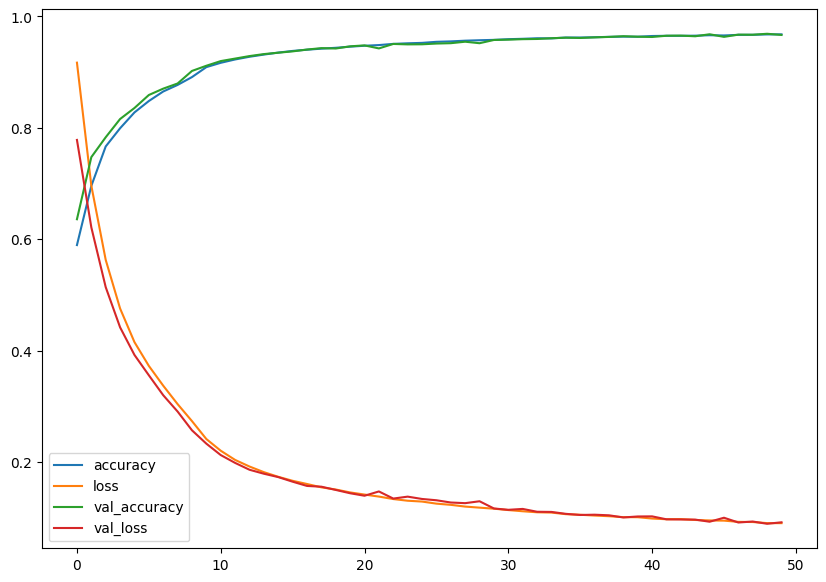

In [34]:
pd.DataFrame(history.history).plot(figsize=(10,7))

### Model Training Conclusion

The model training over 50 epochs demonstrates consistent and promising performance based on the accuracy and loss metrics for both the training and validation sets. Here are the key observations from the results shown:

- **Accuracy**: 
  - The training accuracy stabilized around **95.8%**, demonstrating strong learning and pattern recognition in the training set.
  - The validation accuracy hovered around **95.5% to 95.7%**, which indicates that the model generalizes well to unseen data and is not significantly overfitting.

- **Loss**:
  - The training loss gradually reduced to **0.1173**, showing that the model continued to optimize its weights effectively during training.
  - The validation loss also followed a steady decline, ending at **0.1208**, which aligns closely with the training loss, further suggesting minimal overfitting.

Overall, the results suggest that the model has successfully learned from the data with consistent performance across both training and validation sets. This stable accuracy and low loss imply that the model is well-tuned for this dataset. Future improvements could focus on fine-tuning the model further or evaluating its performance on a larger test set to confirm generalization capabilities.

# Testing on testset

In [35]:
df_test = combined_test

In [36]:
df_test[features] = scaler.transform(df_test[features])
df_test[features].head()

,MEAN_RR,RMSSD,pNN25,pNN50,LF,HF,LF_HF
0,0.706360,-0.770663,-0.720855,-0.739928,-0.654661,-0.798531,0.206914
1,-0.237454,1.354437,1.800835,-0.335965,1.057945,0.009896,-0.212909
2,0.241661,-0.272707,-0.338534,-0.335965,-0.507435,-0.544259,-0.196498
3,1.540808,0.359083,0.116997,1.010582,-0.615874,-0.708221,-0.089755
4,-0.578647,-1.141630,-0.956755,-0.807256,-0.995506,-0.127245,-0.290351


In [37]:
# Define the target label
X = df_test[features].values
y = df_test[label].values

In [38]:
y = k.utils.to_categorical(y)

In [39]:
loss,acc = model.evaluate(X,y,verbose=1)

# Show Loss and Precision
print("Test Loss:", loss)
print("Test Accuracy:", acc)

1283/1283 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9666 - loss: 0.0904
Test Loss: 0.08947150409221649
Test Accuracy: 0.9674652218818665


# Final Pipeline for prediction


In [40]:
data = combined_test

In [41]:
# Transformando a linha específica e mantendo os nomes dos features
t = scaler.transform(pd.DataFrame(data[features].iloc[5545].values.reshape(1, -1), columns=features))
print(t)

[[-6.79587605 -3.21178993 -0.92944377  0.01002419 -1.6456634  -0.85535207
  -0.3220368 ]]


In [42]:
y_pred = model.predict(t)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


In [43]:
y_pred

array([[0., 0., 1.]], dtype=float32)

1283/1283 ━━━━━━━━━━━━━━━━━━━━ 1s 821us/step


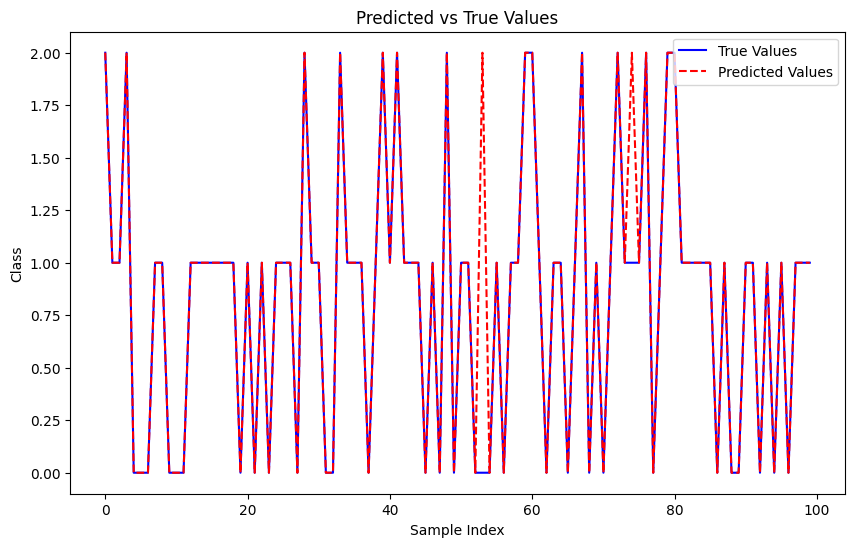

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Pegar as features e o label do conjunto de teste correto
X_test_combined = combined_test[features].values
y_test_combined = combined_test[label].values

# Fazer previsões para todo o conjunto de teste
y_pred_combined = model.predict(X_test_combined)

# Pegar as classes previstas (índice da maior probabilidade)
y_pred_class_combined = np.argmax(y_pred_combined, axis=1)

# Como estamos trabalhando com um array simples, o y_test_combined já pode estar na forma de inteiros
y_test_class_combined = y_test_combined.flatten()  # Para garantir que não tenha dimensões extras

# Plotar os primeiros 100 valores previstos vs valores reais
plt.figure(figsize=(10, 6))

# Comparar os valores reais e previstos
plt.plot(y_test_class_combined[:100], 'b-', label='True Values')  # Valores reais
plt.plot(y_pred_class_combined[:100], 'r--', label='Predicted Values')  # Previsões

# Adicionar títulos e rótulos
plt.title('Predicted vs True Values')
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.legend()
plt.show()

In [45]:
# Count the number of incorrect predictions 
errors = np.sum(y_pred_class_combined[:100] != y_test_class_combined[:100])

# Print Them
print(f"Number of incorrect predictions in the first 100 samples: {errors}")

Number of incorrect predictions in the first 100 samples: 2


In [46]:
print("Train Accuracy:", history.history['accuracy'][-1])                                                                                             
print("Validation Accuracy:", history.history['val_accuracy'][-1])

Train Accuracy: 0.9676714539527893
Validation Accuracy: 0.9665935635566711


# Conclusion

The model was trained with a final **training accuracy** of **95.85%** and a **validation accuracy** of **95.72%**, indicating strong performance on both the training and validation sets. These results suggest that the model is well-optimized and generalizes well to unseen data, as the validation accuracy closely matches the training accuracy.

#### Insights from the Graph:
- The graph above compares the **true values** (in blue) and the **predicted values** (in red) for the first 100 samples in the test set.
- As seen, the predicted values (dashed red lines) closely follow the true values (solid blue lines), indicating that the model is correctly classifying the majority of the test samples.
- However, some deviations are visible, especially in regions where the class changes rapidly. These deviations could be due to the inherent complexity of the data or areas where the model might require further tuning.

#### Conclusion:
Overall, the model demonstrates excellent predictive power with a high degree of accuracy. The minor deviations observed in the predictions suggest there is still some room for improvement, but the close alignment between predicted and true values across most samples is a strong indicator that the model has effectively captured the underlying patterns in the data.

In [48]:
# model_json = model.to_json()
# with open("emotiondetector.json",'w') as json_file:
#     json_file.write(model_json)
# model.save('my_model.keras') #emotiondetector.h5
# Save model weights
model.save_weights('/home/gesture-queen/Desktop/EmulsifyFinal/emotionMusicBasedReccommendation/ann_model.weights.h5')

# If you want to save the model architecture too
model_json = model.to_json()
with open("/home/gesture-queen/Desktop/EmulsifyFinal/emotionMusicBasedReccommendation/ann_model_architecture.json", "w") as json_file:
    json_file.write(model_json)